In [213]:
# Importing some important libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [214]:
tf.__version__

'2.15.0'

In [215]:
# Creating constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
DIRECTORY = 'PlantVillage'
CHANNELS = 3
EPOCHS = 50

In [216]:
type(IMAGE_SIZE)

int

In [217]:
# Load the images from the directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DIRECTORY,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [218]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [219]:
len(dataset)

68

In [220]:
len(dataset) * BATCH_SIZE

2176

(32, 256, 256, 3)
[1 0 2 1 1 1 0 0 1 1 1 0 0 2 1 0 1 1 1 2 0 1 0 0 1 0 2 0 0 0 1 0]
tf.Tensor(
[[[176. 170. 174.]
  [178. 172. 176.]
  [176. 170. 174.]
  ...
  [169. 162. 169.]
  [171. 164. 171.]
  [174. 167. 174.]]

 [[169. 163. 167.]
  [172. 166. 170.]
  [172. 166. 170.]
  ...
  [163. 156. 163.]
  [162. 155. 162.]
  [164. 157. 164.]]

 [[162. 156. 160.]
  [165. 159. 163.]
  [166. 160. 164.]
  ...
  [166. 159. 166.]
  [164. 157. 164.]
  [165. 158. 165.]]

 ...

 [[108.  97. 101.]
  [122. 111. 115.]
  [119. 108. 112.]
  ...
  [121. 110. 114.]
  [126. 115. 119.]
  [132. 121. 125.]]

 [[101.  90.  94.]
  [109.  98. 102.]
  [105.  94.  98.]
  ...
  [109.  98. 102.]
  [116. 105. 109.]
  [115. 104. 108.]]

 [[114. 103. 107.]
  [111. 100. 104.]
  [ 96.  85.  89.]
  ...
  [111. 100. 104.]
  [118. 107. 111.]
  [111. 100. 104.]]], shape=(256, 256, 3), dtype=float32)


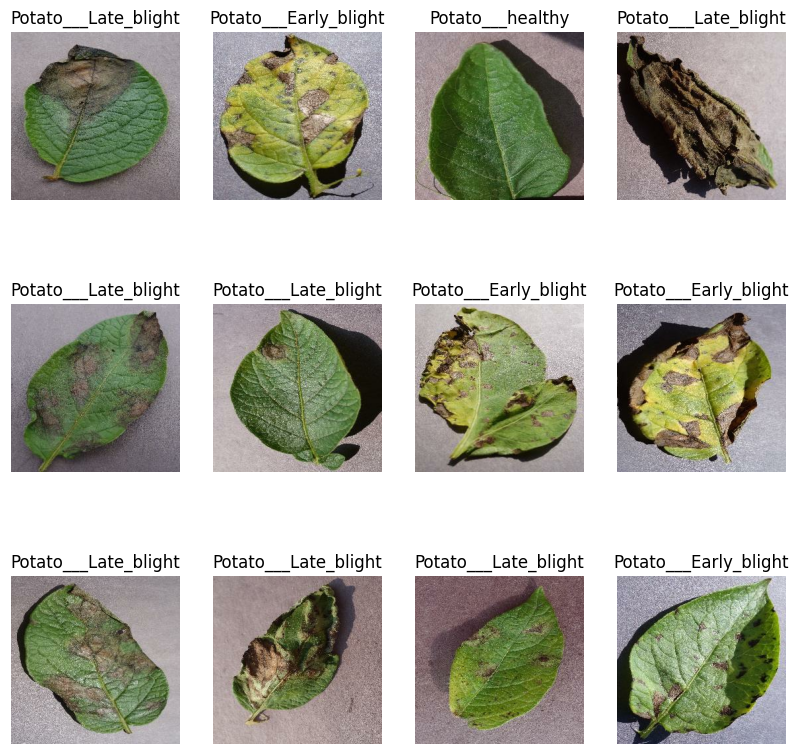

In [221]:
# Exploring the dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    print(image_batch[0])
    # Visualizing the images
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [222]:
# # Splitting the dataset
# # 80% = Training
# # 20% = 10% Validation and 10% Testing
# 
# # Using Train Test Split Method
# 
# train_size = 0.8
# len(dataset) * train_size

In [223]:
# train_ds = dataset.take(54)
# len(train_ds)

In [224]:
# test_ds = dataset.skip(54)
# len(test_ds)

In [225]:
# val_size = 0.1
# len(dataset) * val_size

In [226]:
# val_ds = test_ds.take(6)
# len(val_ds)

In [227]:
# test_ds = test_ds.skip(6)
# len(test_ds)

In [228]:
# Wrapper in a function
def get_dataset_partition(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds  

In [229]:
# Applying the function to the dataset
train_ds, val_ds, test_ds = get_dataset_partition(dataset)
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [230]:
len(train_ds)

54

In [231]:
len(val_ds)

6

In [232]:
len(test_ds)

8

In [233]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [234]:
# Data Pre-Processing
# Scaling

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])  

In [235]:
resize_and_rescale

In [236]:
# Use Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [237]:
data_augmentation

In [238]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [239]:
# Building Model (Convolutional Neural Network)
input_shape = (BATCH_SIZE, 256, 256, CHANNELS)
n_classes = 3

model = Sequential([
    resize_and_rescale,
    data_augmentation,
    Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax'),
])

In [240]:
type(input_shape)

tuple

In [241]:
model.build(input_shape=input_shape)

In [242]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_35 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_36 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_111 (Conv2D)         (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_111 (MaxPool  (32, 127, 127, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_112 (Conv2D)         (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_112 (MaxPool  (32, 62, 62, 64)          0         
 ing2D)                                              

In [243]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [244]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
54/54 [==============================] - 27s 456ms/step - loss: 0.9274 - accuracy: 0.4861 - val_loss: 0.8932 - val_accuracy: 0.4844
Epoch 2/50
54/54 [==============================] - 31s 569ms/step - loss: 0.8098 - accuracy: 0.5845 - val_loss: 0.7732 - val_accuracy: 0.6198
Epoch 3/50
54/54 [==============================] - 22s 402ms/step - loss: 0.5471 - accuracy: 0.7558 - val_loss: 0.4777 - val_accuracy: 0.7969
Epoch 4/50
54/54 [==============================] - 22s 404ms/step - loss: 0.4010 - accuracy: 0.8322 - val_loss: 0.4095 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 22s 401ms/step - loss: 0.3229 - accuracy: 0.8663 - val_loss: 0.2591 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 22s 402ms/step - loss: 0.3333 - accuracy: 0.8663 - val_loss: 0.3507 - val_accuracy: 0.8438
Epoch 7/50
54/54 [==============================] - 22s 400ms/step - loss: 0.2342 - accuracy: 0.9010 - val_loss: 0.3586 - val_accuracy: 0.8542

In [254]:
# Evaluating the model
score = model.evaluate(test_ds)
score

8/8 [==============================] - 1s 100ms/step - loss: 0.0135 - accuracy: 0.9961


[0.0135324876755476, 0.99609375]

In [255]:
# Storing the history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

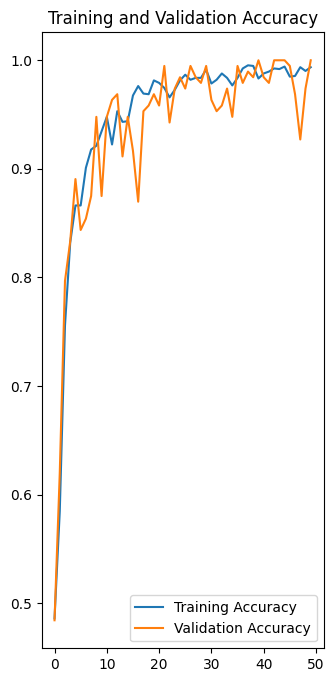

In [256]:
# Plotting the accuracy, loss, val_accuracy, val_loss

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

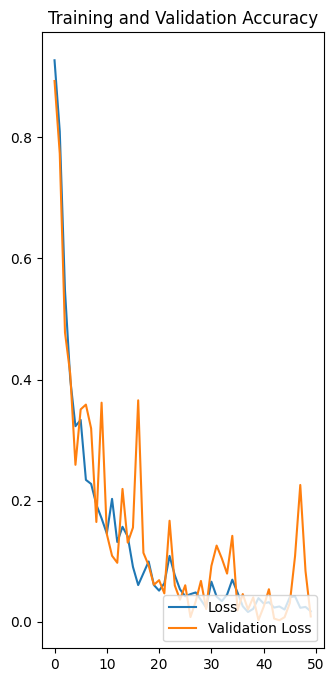

In [257]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label='Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy and Loss')

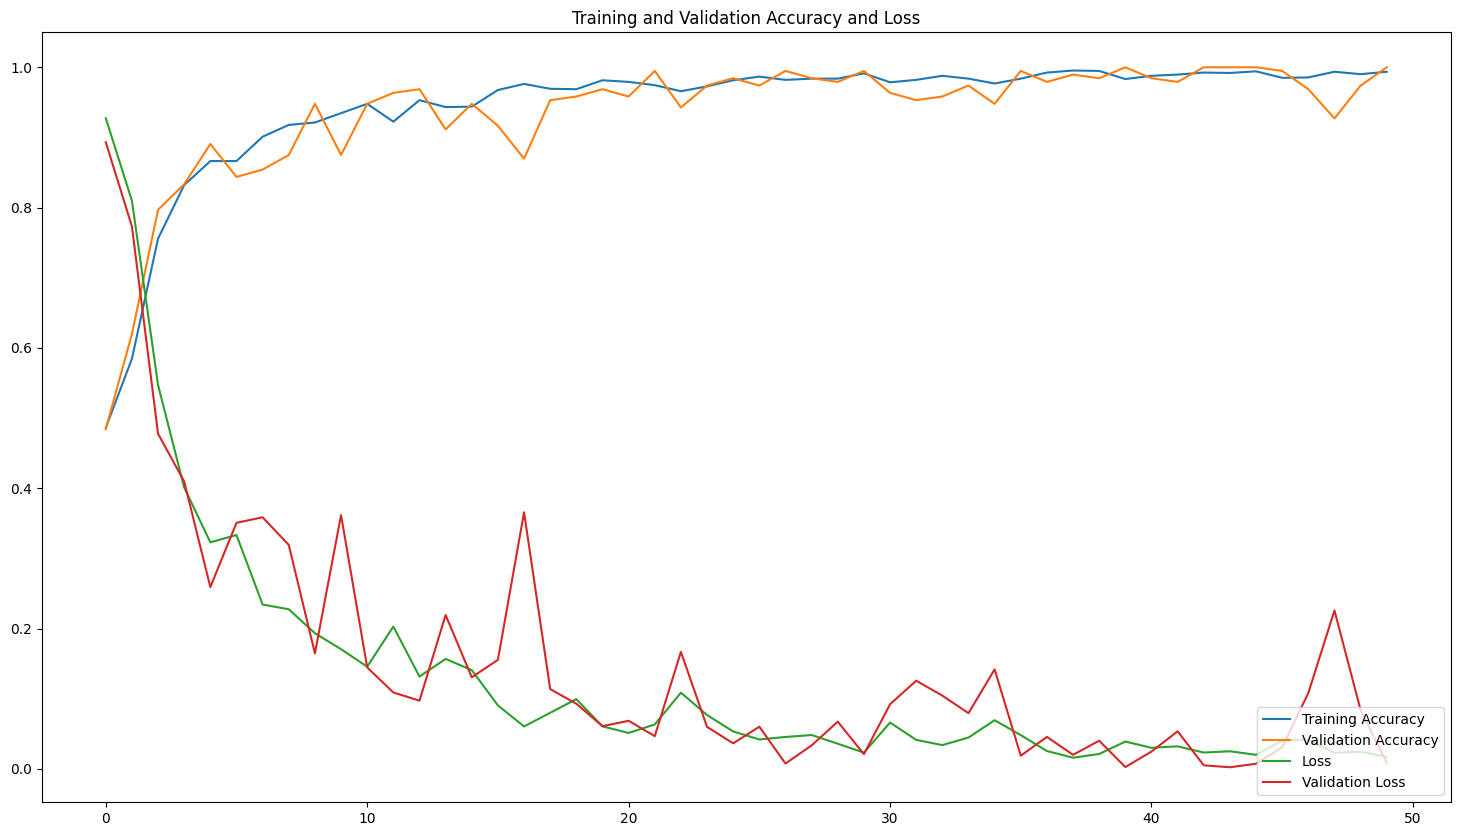

In [258]:
# Combining all graphs
plt.figure(figsize=(40, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.plot(range(EPOCHS), loss, label='Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy and Loss')

In [259]:
import numpy as np

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 106ms/step
predicted label: Potato___Late_blight


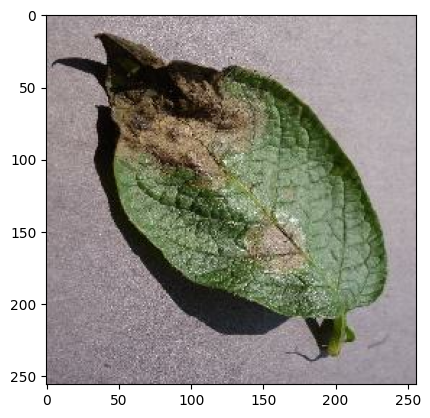

In [261]:
# Predication on test data
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_name[first_label])
    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_name[np.argmax(batch_prediction[0])])

In [262]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 35ms/step


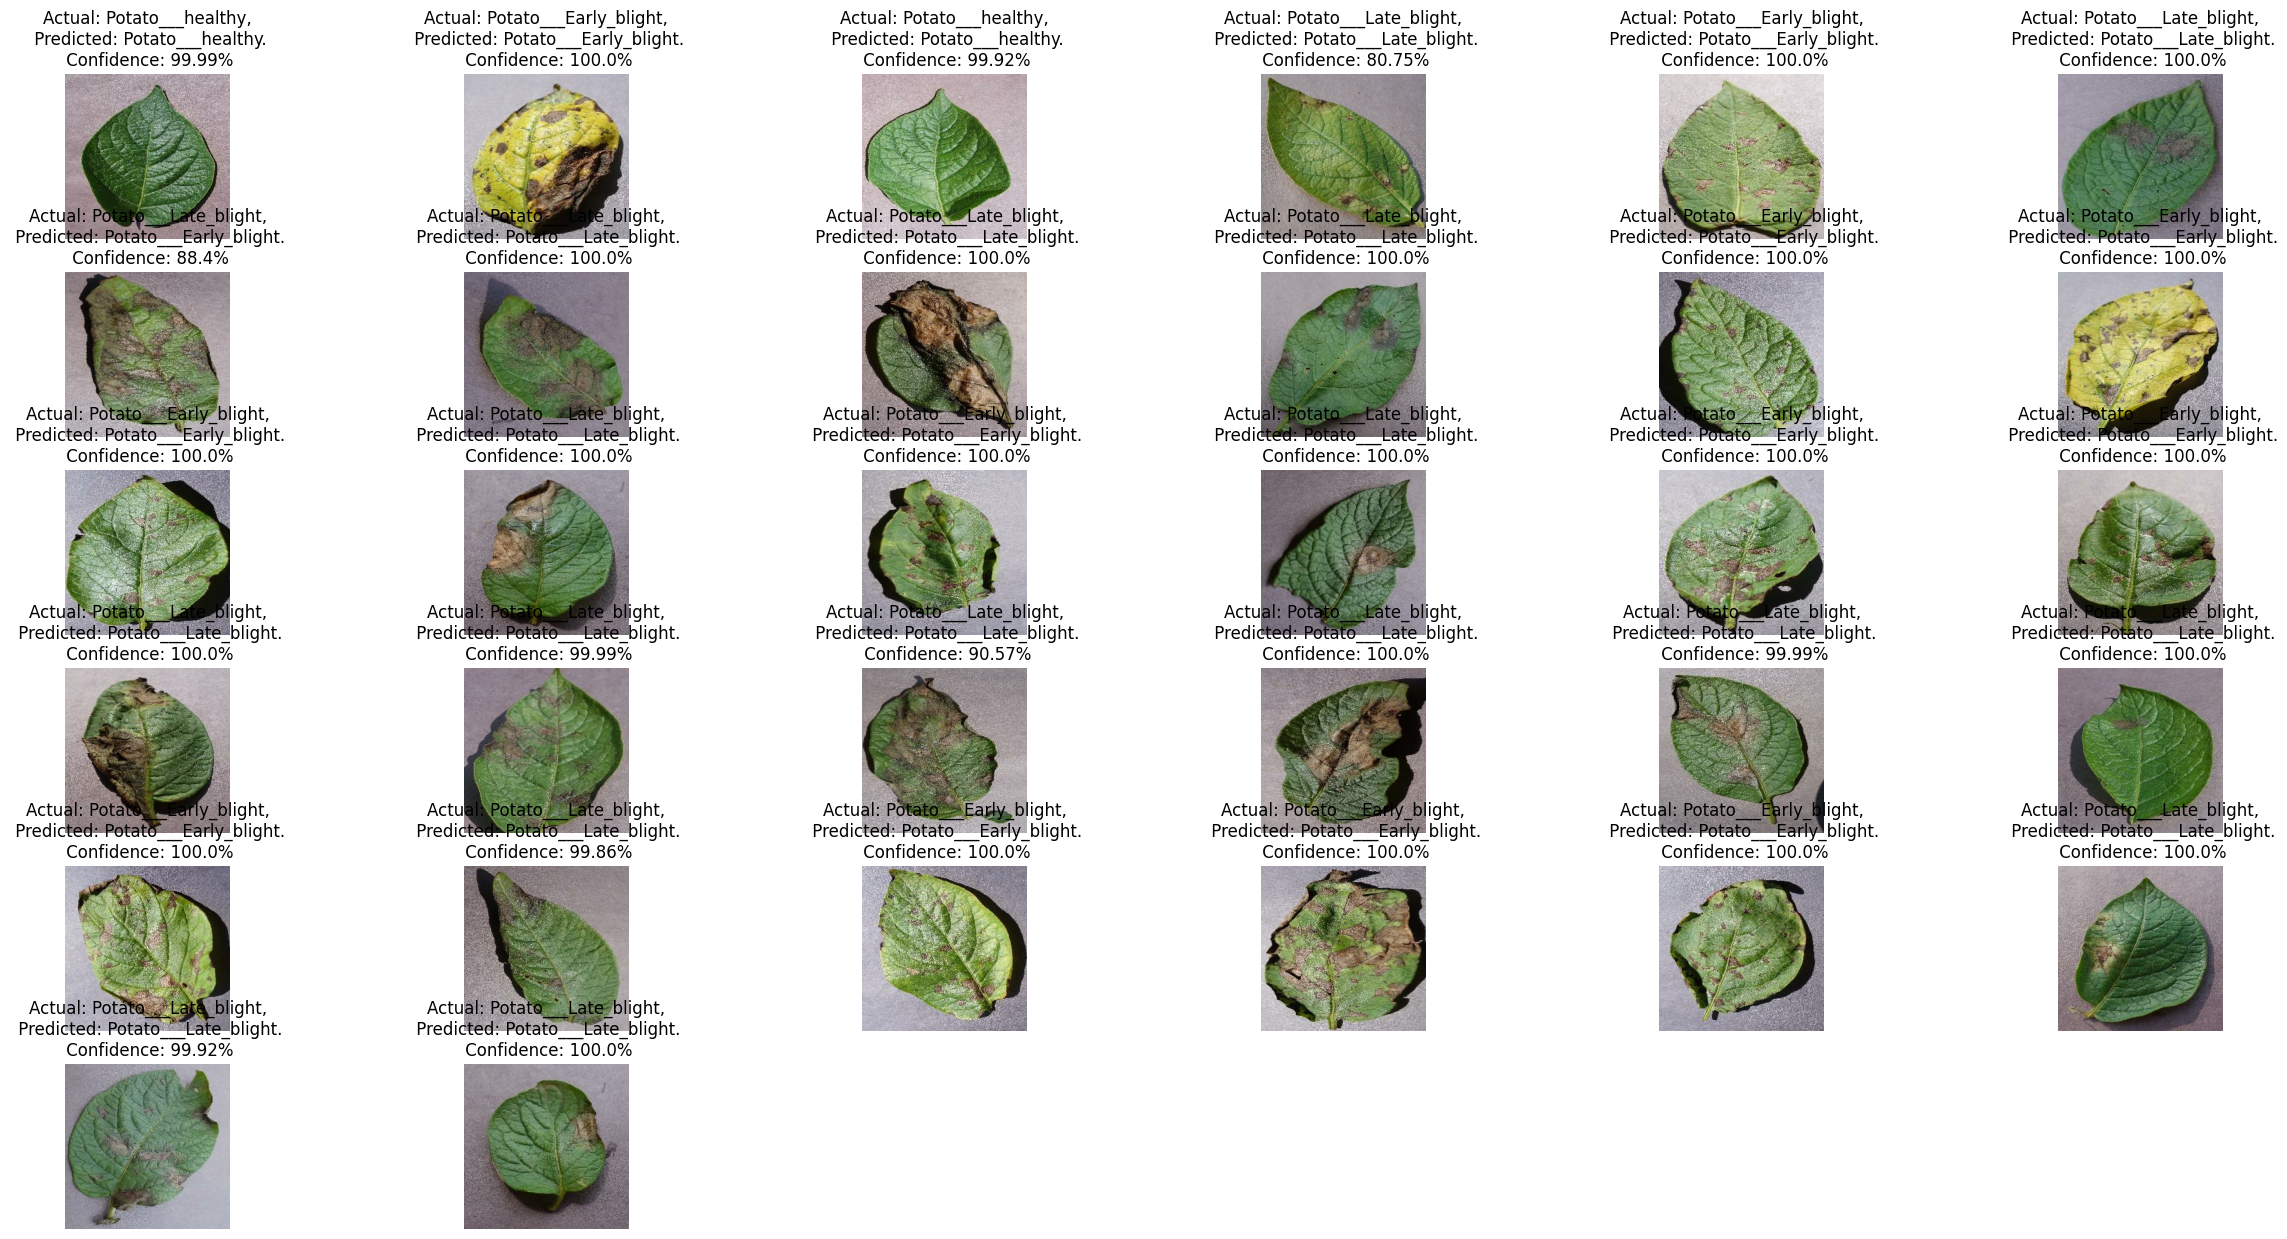

In [266]:
plt.figure(figsize=(30, 15))
for images, labels in test_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")